# Lista 6

In [65]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1
Rozpatrzmy szereg czasowy AR(1)
$$ X_t = \phi X_{t-1} + Z_t,\; t \in Z $$
gdzie $\{Z_t\} \sim WN(0,\sigma^2)$ oraz $|\phi| < 1$. Wysymuluj trajektorię szeregu $\{Xt\}$ o długości 1000 dla następujących parametrów $X_0 = 0, \phi = 0.2, \sigma^2 = 0.4$. Wyznacz empiryczną funkcję autokowariancji i porównaj ją z wynikiem teoretycznym wyprowadzonym na wykładzie.

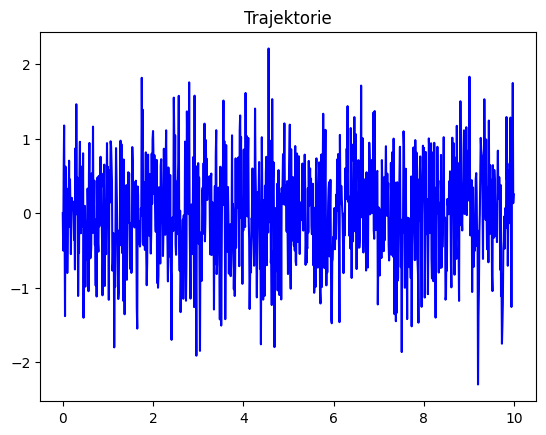

In [66]:
n = 1000
phi = 0.2
sigma = 0.4
Z_t = np.random.normal(0, np.sqrt(sigma), size=n)
h = np.arange(0,21,1)
t = np.arange(0,10,0.01)
X_t = np.zeros(n)
X_t[0] = 0

# model AR(1)
for i in range(1,n):
    X_t[i] = Z_t[i] + phi*X_t[i-1]

plt.plot(t, X_t, c='b')
plt.title('Trajektorie')
plt.show()

In [68]:
def cov(sigma,phi,h):
    return (sigma * phi**abs(h))/(1-phi**2)

def corr(phi,h):
    return phi**abs(h)

def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

def autocorr(x,h,n):
    return autocov(x,h,n)/autocov(x,0,n)

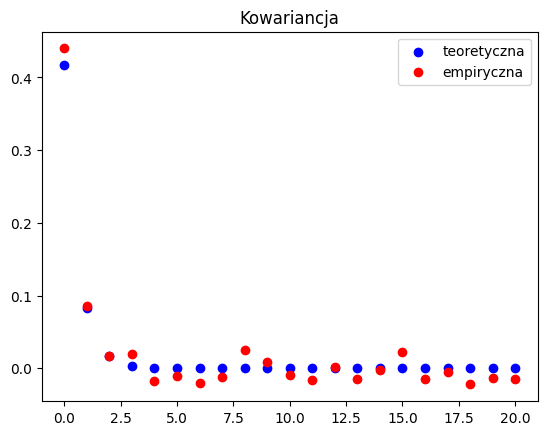

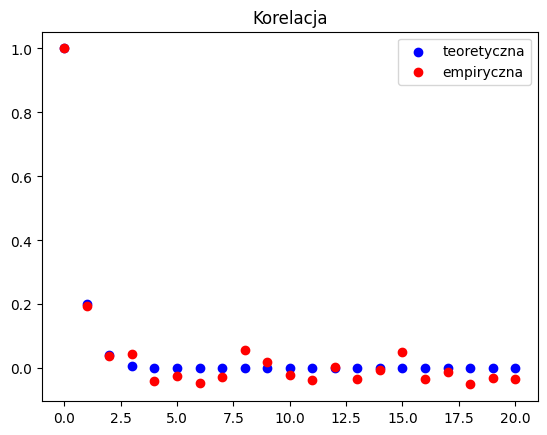

In [69]:
for i, h_ in enumerate(h):
    plt.scatter(i, cov(sigma, phi, h_), c='b')
    plt.scatter(i, autocov(X_t, h_, n), c='r')
plt.legend(['teoretyczna', 'empiryczna'])
plt.title('Kowariancja')
plt.show()

for i, h_ in enumerate(h):
    plt.scatter(i, corr(phi, h_), c='b')
    plt.scatter(i, autocorr(X_t, h_, n), c='r')
plt.legend(['teoretyczna', 'empiryczna'])
plt.title('Korelacja')
plt.show()

## Zadanie 2
Dla modelu AR(1) z poprzedniego zadania symulacyjnie wyznacz przedziały ufności dla autokowariancji oraz autokorelacji.

In [88]:
N = 100
n = 1000
phi = 0.2
sigma = 0.4
h = np.arange(0,51,1)
t = np.arange(0,10,0.01)
AR1 = np.zeros((N,n))

for j in range(N):
    Z_t = np.random.normal(0, np.sqrt(sigma), size=n)
    X_t = np.zeros(n)
    X_t[0] = 0

    # model AR(1)
    for i in range(1,n):
        X_t[i] = Z_t[i] + phi*X_t[i-1]
        AR1[j,i] = X_t[i]

print(AR1)

[[ 0.         -0.03719922 -0.16351602 ... -0.24822825  1.01669177
   1.1896627 ]
 [ 0.          0.59878607  0.24658493 ...  0.67029085  0.22717607
  -0.33771698]
 [ 0.         -0.13009933 -0.83592161 ...  0.40566257 -0.20069399
   0.69379526]
 ...
 [ 0.          0.91415214  0.28738728 ... -0.43853865  0.22450691
   0.42434613]
 [ 0.         -0.31951722  0.03275289 ... -0.29367782 -0.13430938
   0.75315914]
 [ 0.         -0.11163506  0.50971446 ... -0.5167166   0.06586608
   0.14951438]]


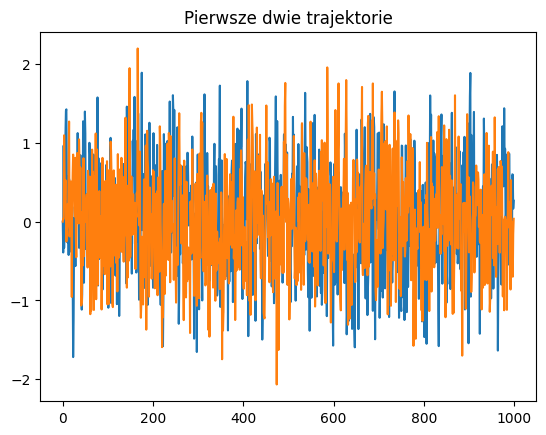

In [82]:
plt.plot(range(AR1.shape[1]), AR1[:2,:].T)     #pierwsza wspolrzedna -> nr trajektorii, druga wspolrzedna -> dana trajektoria
plt.title('Pierwsze dwie trajektorie')
plt.show()

In [84]:
autocov_array = np.zeros((N,len(h)))

for j in range(N):
    for i, h_ in enumerate(h):
        autocov_array[j,i] = autocov(AR1[j], h_, n)

print(autocov_array)

[[ 4.50565689e-01  9.52532357e-02  2.31777745e-02 ...  1.70772922e-03
  -1.05584728e-02 -8.49426831e-03]
 [ 4.10793354e-01  8.68527264e-02  3.12879173e-02 ...  1.66837260e-02
   1.76429512e-02 -5.37538789e-03]
 [ 4.05476362e-01  1.01072216e-01  4.60352644e-02 ... -1.42216454e-03
  -1.34607287e-02 -4.80236131e-03]
 ...
 [ 4.20522675e-01  6.64912852e-02  5.07736375e-02 ... -6.92215579e-03
   1.18606064e-02 -2.45467755e-03]
 [ 4.47278613e-01  9.04774183e-02  1.88633642e-02 ... -8.22765645e-03
  -3.55290577e-04  1.38149863e-02]
 [ 3.92882467e-01  7.35352905e-02  3.92466340e-03 ... -1.41615410e-02
   5.60803614e-04  6.68950493e-03]]


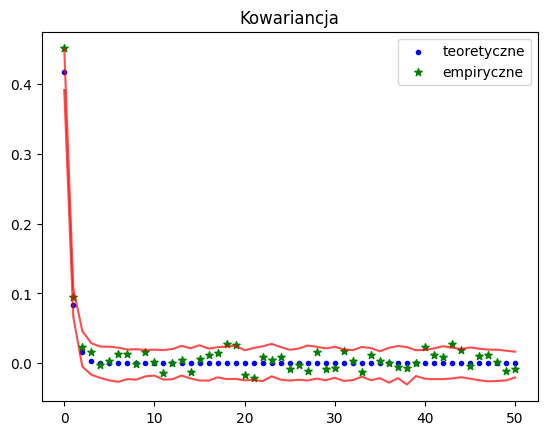

In [127]:
_cov = np.zeros(len(h))
cov_ = np.zeros(len(h))

for i, h_ in enumerate(h):
    _cov[i] = np.quantile(autocov_array[:,i], 0.05)
    cov_[i] = np.quantile(autocov_array[:,i], 0.95)

plt.scatter(h, cov(sigma,phi,h), s=9, c='b', label='teoretyczne')
plt.scatter(h, autocov_array[0,:], s=30, c='g', marker='*', label='empiryczne')
plt.plot(h, _cov, c='r', alpha=0.7)
plt.plot(h, cov_, c='r', alpha=0.7)
plt.legend()
plt.title('Kowariancja')
plt.show()

In [132]:
autocorr_array = np.zeros((N,len(h)))

for j in range(N):
    for i, h_ in enumerate(h):
        autocorr_array[j,i] = autocorr(AR1[j], h_, n)
        
print(autocorr_array)

[[ 1.          0.19011794  0.0808357  ... -0.03897965  0.01383827
  -0.00453185]
 [ 1.          0.21485098  0.05125641 ... -0.01500326 -0.07011521
  -0.01467413]
 [ 1.          0.23084057  0.0571541  ... -0.01950511 -0.03236778
   0.00245043]
 ...
 [ 1.          0.24206868  0.07861321 ...  0.00404555 -0.00326887
  -0.01043786]
 [ 1.          0.20266202 -0.00640408 ... -0.0126786   0.04143187
   0.00666984]
 [ 1.          0.21609455  0.04470783 ... -0.00982402  0.01290789
   0.02977053]]


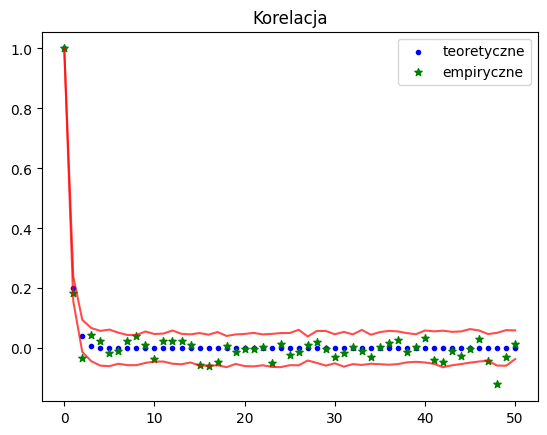

In [139]:
_corr = np.zeros(len(h))
corr_ = np.zeros(len(h))

for i, h_ in enumerate(h):
    _corr[i] = np.quantile(autocorr_array[:,i], 0.05)
    corr_[i] = np.quantile(autocorr_array[:,i], 0.95)

plt.scatter(h, corr(phi,h), s=9, c='b', label='teoretyczne')
plt.scatter(h, autocorr_array[5,:], s=30, c='g', marker='*', label='empiryczne')
plt.plot(h, _corr, c='r', alpha=0.7)
plt.plot(h, corr_, c='r', alpha=0.7)
plt.legend()
plt.title('Korelacja')
plt.show()